In [35]:
%matplotlib inline
%config InLineBackend.figure_format = 'svg'

from qiskit import QuantumCircuit, ClassicalRegister, execute
from qiskit.visualization import plot_histogram
from qiskit import IBMQ, BasicAer

from qiskit.providers.ibmq import least_busy

In [2]:
s = '11'

In [7]:
n = 2 * len(str(s))
SimonCircuit = QuantumCircuit(n)
barriers = True

SimonCircuit.h(range(len(str(s))))

if barriers:
    SimonCircuit.barrier()
    
for index, value in enumerate(str(s)):
    if value == '0':
        pass
    elif value == '1':
        for i in range(len(str(s))):
            SimonCircuit.cx(index, len(str(s)) + i)
    else:
        print('s cannot have values besides 0 and 1!')

if barriers:
    SimonCircuit.barrier()
    
SimonCircuit.h(range(len(str(s))))

SimonCircuit.measure_all()

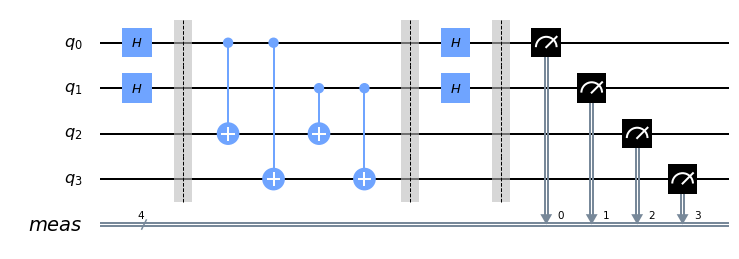

In [8]:
SimonCircuit.draw(output='mpl')

In [48]:
def Simon_circuit(s):
    n = 2 * len(str(s))
    SimonCircuit = QuantumCircuit(n, len(str(s)))
    barriers = True
    
    SimonCircuit.h(range(len(str(s))))

    if barriers:
        SimonCircuit.barrier()
        
    for index, value in enumerate(str(s)):
        if value == '0':
            pass
        elif value == '1':
            for i in range(len(str(s))):
                SimonCircuit.cx(index, len(str(s)) + i)
        else:
            print('s cannot have values besides 0 and 1!')

    if barriers:
        SimonCircuit.barrier()
    
    SimonCircuit.h(range(len(str(s))))
    for i in range(len(str(s))):
        SimonCircuit.measure(i, i)
    
    return SimonCircuit

In [66]:
SimonCircuit = Simon_circuit('11')

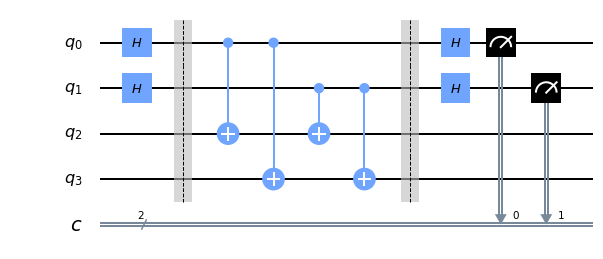

In [67]:
SimonCircuit.draw(output='mpl')

In [68]:
backend = BasicAer.get_backend('qasm_simulator')
count = execute(SimonCircuit, backend, shots = 1024).result().get_counts()

In [69]:
count

{'11': 515, '00': 509}

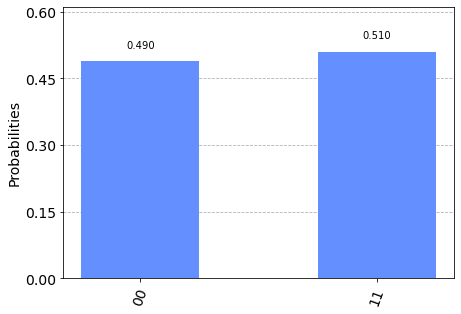

In [70]:
plot_histogram(answer_plot)

In [54]:
# Calculate the dot product of the results
def sdotz(a, b):
    accum = 0
    for i in range(len(a)):
        accum += int(a[i]) * int(b[i])
    return (accum % 2)

print('s, z, s.z (mod 2)')
for z_rev in answer_plot:
    z = z_rev[::-1]
    print( '{}, {}, {}.{}={}'.format(s, z, s,z,sdotz(s,z)) )

s, z, s.z (mod 2)
11, 00, 11.00=0
11, 11, 11.11=0


In [55]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [63]:
provider = IBMQ.get_provider(hub='ibm-q')

In [72]:
backend = least_busy(providers.backends(filters=lambda b: b.configuration().n_qubits > 2 and
                                      not b.configuration().simulator and b.status().operational == True))

In [73]:
job_exp = execute(SimonCircuit, backend, shots=1024)

{'11': 293, '10': 178, '00': 329, '01': 224}


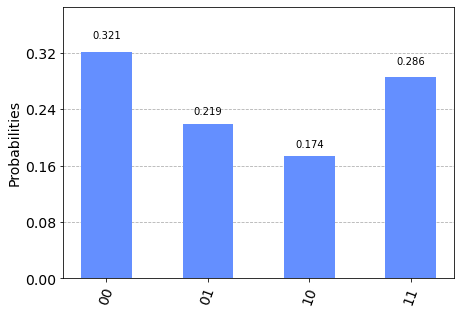

In [74]:
job_exp_result = job_exp.result()
job_exp_counts = job_exp_result.get_counts()
print(job_exp_counts)
plot_histogram(job_exp_counts)

In [76]:
accuracy = round(((job_exp_counts['11'] + job_exp_counts['00'])/1024)*100, 2)
print("The accuracy on {} for Simon's Algorithm is {}%".format(backend, accuracy))

The accuracy on ibmqx2 for Simon's Algorithm is 60.74%
